# Matilde Armageddon Presentation


In [1]:
%matplotlib inline
import armageddon
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import dask
import scipy.interpolate as si
import itertools
import time

Our solve_atmospheric_entry uses Runge Kutta 34 to determine the numerical solution to the given problem.


```python

## Our solving routine

# The system of ODEs
def f(self, y, fragmented, density):
        # 0: velocity
        # 1: mass
        # 2: angle
        # 3: altitude
        # 4: distance
        # 5: radius
        f = np.zeros_like(y)
        f[0] = - (self.Cd * self.rhoa(y[3]) * y[0]**2 * np.pi * y[5]**2) / (2 * y[1]) + (self.g * np.sin(y[2]))
        f[1] = - (self.Ch * self.rhoa(y[3]) * np.pi * y[5]**2 * y[0]**3) / (2 * self.Q)
        f[2] = (self.g * np.cos(y[2])) / y[0]  - (self.Cl * self.rhoa(y[3]) * np.pi * y[5]**2 * y[0]) / (2 * y[1]) - (y[0] * np.cos(y[2])) / (self.Rp + y[3])
        f[3] = - y[0] * np.sin(y[2])
        f[4] = (y[0] * np.cos(y[2])) / (1 + y[3] / self.Rp)
        if fragmented == True:
            f[5] = np.sqrt(7/2 * self.alpha * self.rhoa(y[3]) / density) * y[0]
        else:
            f[5] = 0
        return f
    
# Runge_kutta
def runge_kutta(self, y, f, dt, fragmented, density):
        k1 = f(y, fragmented, density) * dt
        k2 = f(y+k1/2, fragmented, density) * dt
        k3 = f(y+k2/2, fragmented, density) * dt
        k4 = f(y+k3, fragmented, density) * dt

        y = y + (k1 + 2 * (k2 + k3) + k4) / 6
        return y
```

In [26]:
# Defining earth atmosphere with exponential atmospheric pressure
earth = armageddon.Planet(atmos_func='exponential')

# Get impact information for a given set of input parameters
radius = 10      # of the asteroid - assuming sphere
velocity = 20e3  # entry velocity of the asteroid
density = 3000   # density of the asteroid in kg/m^3
strength = 1e5   # strength of the asteroid - to determine asteroid fragmentation during atmospheric entry
angle = 45       # angle of entry

df, dic = earth.impact(radius=17, velocity=22e3, density=3300, strength=8*1e5, angle=2.5,
               init_altitude=100e3, dt=0.05, radians=False,
               fragmentation=True, num_scheme='RK', ensemble=False)

df # numerical solution given initial conditions

,velocity,mass,angle,altitude,distance,radius,time,dedz
0,22000.000000,6.791244e+07,2.500000,1.000000e+05,0.000000e+00,17.0,0.00,0.0
1,22000.020634,6.791243e+07,2.491546,9.995210e+04,1.081978e+03,17.0,0.05,0.0
2,22000.041190,6.791241e+07,2.483091,9.990436e+04,2.163973e+03,17.0,0.10,0.0
3,22000.061671,6.791240e+07,2.474637,9.985679e+04,3.245983e+03,17.0,0.15,0.0
4,22000.082074,6.791239e+07,2.466182,9.980937e+04,4.328009e+03,17.0,0.20,0.0
5,22000.102401,6.791238e+07,2.457727,9.976212e+04,5.410051e+03,17.0,0.25,0.0
6,22000.122651,6.791237e+07,2.449273,9.971503e+04,6.492108e+03,17.0,0.30,0.0
7,22000.142825,6.791236e+07,2.440817,9.966810e+04,7.574181e+03,17.0,0.35,0.0
8,22000.162921,6.791235e+07,2.432362,9.962134e+04,8.656270e+03,17.0,0.40,0.0
9,22000.182941,6.791234e+07,2.423907,9.957473e+04,9.738375e+03,17.0,0.45,0.0


In [27]:
dic  # type of entry event with data analysis results

{'burst_peak_dedz': 39.724607827225675,
 'burst_altitude': 92912.49161101581,
 'burst_total_ke_lost': 0.5503484482643404,
 'outcome': 'Airburst'}

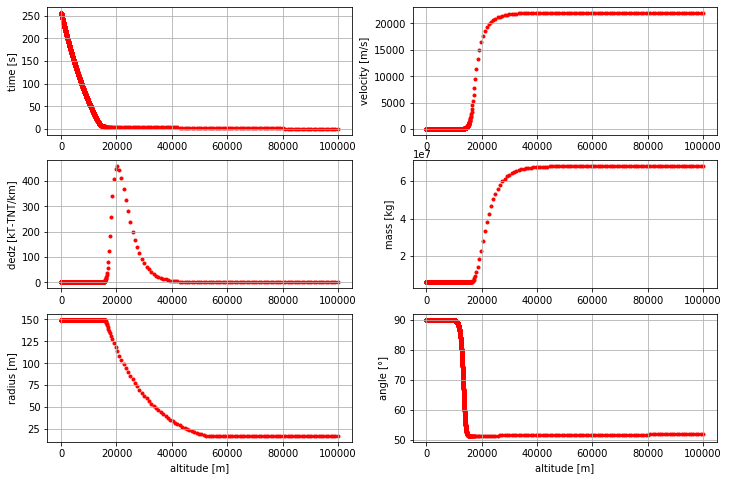

In [23]:
earth.plot_results(df)  # plot results with build-in function

In [5]:
# introducing our solvers
import time

schemes_armageddon = ['EE', 'IE', 'MIE', 'RK'] # Explicit Euer, Implicit Euler, Midpoint Implicit Euler, Runge Kutte
armageddon_dfs = []

for i in range(len(schemes_armageddon)):
    start_time = time.time()
    df, dic = earth.impact(radius=10, velocity=20e3, density=3000, strength=1e5, angle=45,
                   init_altitude=100e3, dt=0.05, radians=False,
                   fragmentation=True, num_scheme=schemes_armageddon[i], ensemble=False)
    print(schemes_armageddon[i], 'ran in ', time.time()-start_time, 's')
    armageddon_dfs.append(df)

EE ran in  0.49224400520324707 s
IE ran in  0.735724687576294 s
MIE ran in  1.052628993988037 s
RK ran in  1.5342559814453125 s


(20000.0, 40000.0)

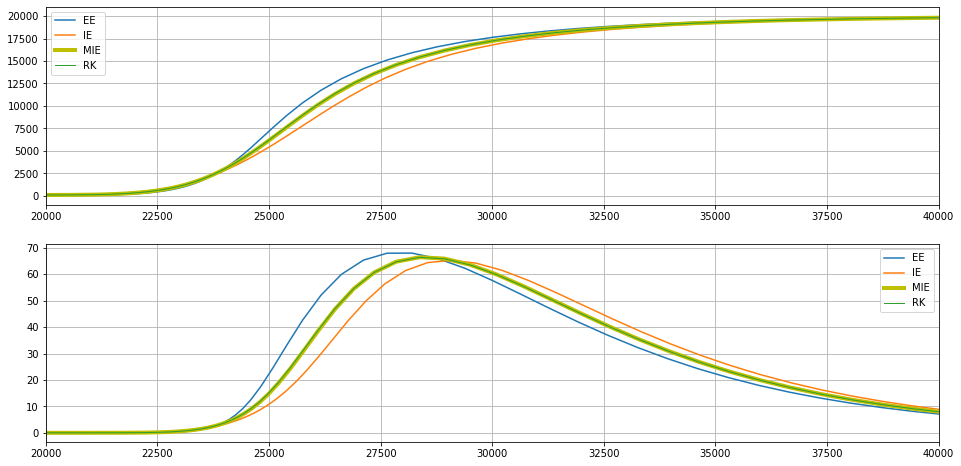

In [6]:
fig = plt.figure(figsize=(16, 8))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)

ax1.plot(armageddon_dfs[0].altitude, armageddon_dfs[0].velocity, label='EE')
ax1.plot(armageddon_dfs[1].altitude, armageddon_dfs[1].velocity, label='IE')
ax1.plot(armageddon_dfs[2].altitude, armageddon_dfs[2].velocity, label='MIE', linewidth='4', color='y')
ax1.plot(armageddon_dfs[3].altitude, armageddon_dfs[3].velocity, label='RK', linewidth='1')
ax1.grid()
ax1.legend()
ax1.set_xlim(2e4, 4e4)

ax2.plot(armageddon_dfs[0].altitude, armageddon_dfs[0].dedz, label='EE')
ax2.plot(armageddon_dfs[1].altitude, armageddon_dfs[1].dedz, label='IE')
ax2.plot(armageddon_dfs[2].altitude, armageddon_dfs[2].dedz, label='MIE', linewidth='4', color='y')
ax2.plot(armageddon_dfs[3].altitude, armageddon_dfs[3].dedz, label='RK', linewidth='1')
ax2.grid()
ax2.legend()
ax2.set_xlim(2e4, 4e4)

## Demonstration of accuracy
### Analytical  vs  Armageddon  vs  Scipy

```python
def anal_sol(H_plot, radius=10, velocity=20e3, density=3000, strength=10e5, angle=45,
               init_altitude=100e3, radians=False):
    '''
    Solves analytical solution for meteroid impact

    Parameters
    ----------

    radius : float
        The radius of the asteroid in meters

    velocity : float
        The entery speed of the asteroid in meters/second

    density : float
        The density of the asteroid in kg/m^3

    strength : float
        The strength of the asteroid (i.e., the ram pressure above which
        fragmentation and spreading occurs) in N/m^2 (Pa)

    angle : float
            The initial trajectory angle of the asteroid to the horizontal
            By default, input is in degrees. If 'radians' is set to True, the
            input should be in radians

    init_altitude : float, optional
        Initial altitude in m

    radians : logical, optional
        Whether angles should be given in degrees or radians. Default=False
        Angles returned in the DataFrame will have the same units as the
        input
    

    Returns
    -------
    Result : DataFrame
            pandas dataFrame with collumns:
            altitude, velocity, dedz

    '''
    # define constants
    Cd = 1 # drag coefficient
    H = 8000 # atomspheric consatnt
    rho = 1.2 # air density at the ground

    # define initial conditions

    m = 4/3 * np.pi * radius**3 * density # mass, asteroid to be assumed as spheric shape
    A = np.pi * radius**2 # cross-sectional area

    if radians is False: # converts degrees to radians
        angle = angle * (np.pi)/180
    
    # constant in analytical solution
    c = velocity/(np.exp((-Cd * A * rho * H / (2 * m * np.sin(angle))) * np.exp(-init_altitude/H)))

    def v_h(h):
        return c * np.exp((-Cd * A * rho * H / (2 * m * np.sin(angle))) * np.exp(-h/H))

    C2 = -Cd * A * rho * H / (2 * m * np.sin(angle))
    
    def dEdz(z):
        return c * np.exp(C2 * np.exp(-z/H)) * C2 * np.exp(-z/H) * (-1/H) * m * v_h(z)

    #H_plot = np.linspace(100000, 0, 200)
    v_plot = v_h(H_plot)

    dedz = np.zeros((len(v_plot),)) # create array to store dedz results
    dedz[0] = 0 # initial dedz
    for i in range(1,len(v_plot)): # loop through all rows of result
            energy = ((1/2 * m * v_plot[i]**2) - (1/2 * m * v_plot[i-1]**2))/4.184e12
            alt = (H_plot[i] - H_plot[i-1])/1e3
            dedz[i] = energy / alt
    #dEdz_plot = dedz(H_plot)

    result = pd.DataFrame({'altitude':H_plot, 'velocity':v_plot, 'dedz':dedz})
    #result = result.sort_values(by='altitude', ascending=False)

    return result
```

```python
def sci_sol(radius=10, velocity=20e3, density=3000, strength=10e5, angle=45, init_altitude=100e3, distance=0, dt=0.05, fragmentation=True, num_scheme='RK45', radians=False, C_D=1., C_H=0.1, Q=1e7, C_L=1e-3, R_p=6371e3, g=9.81, rho_0=1.2, H=8000, alpha=0.3):
    '''
    Solves analytical solution for meteroid impact

    Parameters
    ----------

    radius : float
        The radius of the asteroid in meters

    velocity : float
        The entery speed of the asteroid in meters/second

    density : float
        The density of the asteroid in kg/m^3

    strength : float
        The strength of the asteroid (i.e., the ram pressure above which
        fragmentation and spreading occurs) in N/m^2 (Pa)

    angle : float
           The initial trajectory angle of the asteroid to the horizontal
           By default, input is in degrees. If 'radians' is set to True, the
           input should be in radians

    init_altitude : float, optional
        Initial altitude in m

    radians : logical, optional
        Whether angles should be given in degrees or radians. Default=False
        Angles returned in the DataFrame will have the same units as the
        input


   Returns
   -------
   Result : DataFrame
           pandas dataFrame with collumns:
           altitude, velocity, dedz

   '''
    if radians is False:  # converts degrees to radians
        angle = angle * (np.pi) / 180

    mass = 4 / 3 * np.pi * (radius ** 3) * density
    y = np.array([velocity, mass, angle, init_altitude, distance, radius])

    rho_a = lambda x: rho_0 * np.exp(-x/H)

    def f(self, y):
        '''
        0: velocity
        1: mass
        2: angle
        3: altitude
        4: distance
        5: radius
        '''
        f = np.zeros_like(y)
        f[0] = - (C_D * rho_a(y[3]) * y[0]**2 * np.pi * y[5]**2) / (2 * y[1]) + (g * np.sin(y[2]))
        f[1] = - (C_H * rho_a(y[3]) * np.pi * y[5]**2 * y[0]**3) / (2 * Q)
        f[2] = g * np.cos(y[2]) / y[0]  - (C_L * rho_a(y[3]) * np.pi * y[5]**2 * y[0]) / (2 * y[1]) - (y[0] * np.cos(y[2])) / (R_p + y[3])
        f[3] = - y[0] * np.sin(y[2])
        f[4] = (y[0] * np.cos(y[2])) / (1 + y[3] / R_p)
        if fragmentation == True:
            f[5] = np.sqrt(7/2 * alpha * rho_a(y[3]) / density) * y[0]
        else:
            f[5] = 0
        return f
    
    tmax = 120
    t = np.arange(0, tmax, dt)
    result = solve_ivp(f, [0, tmax], y, method=num_scheme, t_eval=t)
    result = result.y

    dedz = np.zeros(len(result[0]))
    ke = ((1/2 * result[1, 1:] * result[0, 1:]**2) - (1 / 2 * result[1, :-1] * result[0, :-1]**2)) / 4.184e12
    alt = (result[3, 1:] - result[3, :-1]) / 1e3
    dedz[1:] = ke / alt
    i = np.where(dedz < 0)
    dedz[i] = 0

    result = pd.DataFrame({'velocity': result[0], 'mass': result[1], 'angle': result[2], 'altitude': result[3], 'distance': result[4], 'radius': result[5], 'time': t, 'dedz': dedz})

    return result
```

In [7]:
import analytical
import scipy_test

radius = 10      # of the asteroid - assuming sphere
velocity = 20e3  # entry velocity of the asteroid
density = 3000   # density of the asteroid in kg/m^3
strength = 1e5   # strength of the asteroid - to determine asteroid fragmentation during atmospheric entry
angle = 45       # angle of entry

earth_anal = armageddon.Planet(atmos_func='exponential', g=0, Cl=0, Ch=0) # set assumptions required to compare with analytical solution

df, dic = earth_anal.impact(radius=10, velocity=20e3, density=3000, strength=1e5, angle=45,
               init_altitude=100e3, dt=0.05, radians=False,
               fragmentation=False, num_scheme='RK', ensemble=False) # Note fragmentation=False

anal_solution = analytical.anal_sol(H_plot=df.altitude, radius=10, velocity=20e3, density=3000, strength=1e5, angle=45,
               init_altitude=100e3)

sci_solution = scipy_test.sci_sol(radius=10, velocity=20e3, density=3000, strength=1e5, angle=45, init_altitude=100e3, dt=0.05, fragmentation=False,
                       num_scheme='RK45', C_H=0, C_L=0, g=0) # set assumptions required to compare with analytical solution


(0, 100000.0)

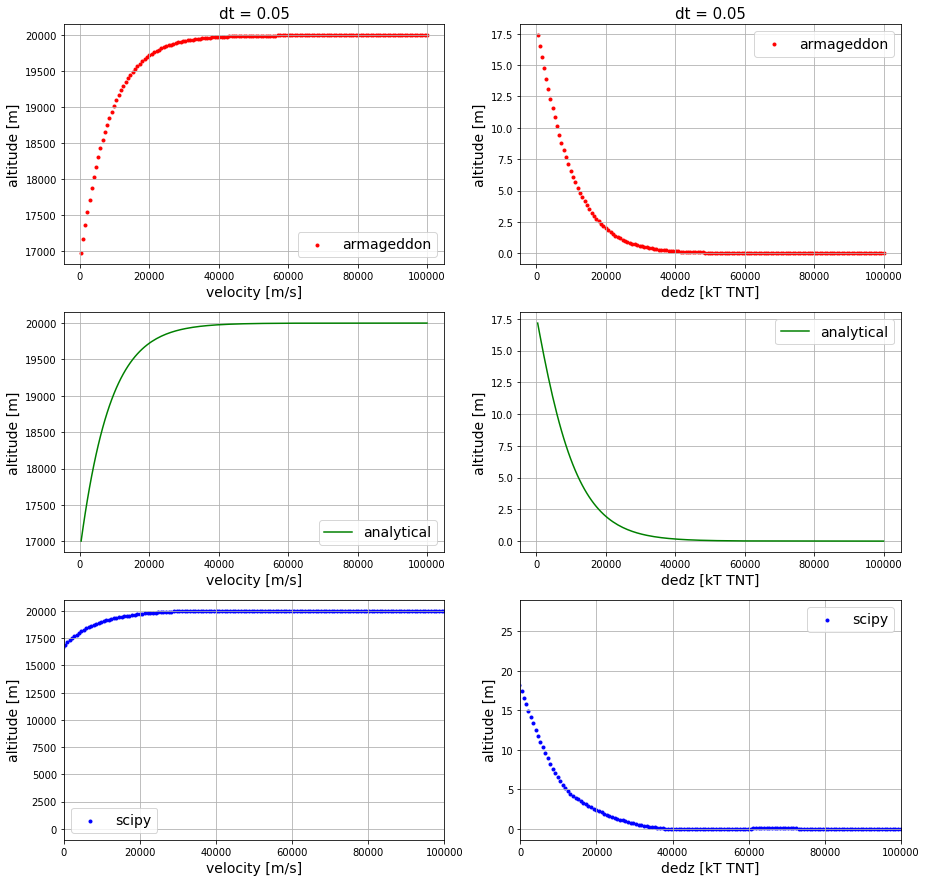

In [8]:
fig = plt.figure(figsize=(15, 15))
ax1 = plt.subplot(321)
ax2 = plt.subplot(322)
ax3 = plt.subplot(323)
ax4 = plt.subplot(324)
ax5 = plt.subplot(325)
ax6 = plt.subplot(326)

ax1.scatter(df.altitude, df.velocity, color='r', marker='.', label='armageddon')
ax1.set_ylabel('altitude [m]', fontsize='14')
ax1.set_xlabel('velocity [m/s]', fontsize='14')
ax1.grid()
ax1.legend(fontsize='14')
ax1.set_title('dt = 0.05', fontsize='15')

ax2.scatter(df.altitude, df.dedz, color='r', marker='.', label='armageddon')
ax2.set_ylabel('altitude [m]', fontsize='14')
ax2.set_xlabel('dedz [kT TNT]', fontsize='14')
ax2.grid()
ax2.legend(fontsize='14')
ax2.set_title('dt = 0.05', fontsize='15')

ax3.plot(anal_solution.altitude, anal_solution.velocity, color='g', label='analytical')
ax3.set_ylabel('altitude [m]', fontsize='14')
ax3.set_xlabel('velocity [m/s]', fontsize='14')
ax3.grid()
ax3.legend(fontsize='14')

ax4.plot(anal_solution.altitude, anal_solution.dedz, color='g', label='analytical')
ax4.set_ylabel('altitude [m]', fontsize='14')
ax4.set_xlabel('dedz [kT TNT]', fontsize='14')
ax4.grid()
ax4.legend(fontsize='14')

ax5.scatter(sci_solution.altitude, sci_solution.velocity, color='b', marker='.', label='scipy')
ax5.set_ylabel('altitude [m]', fontsize='14')
ax5.set_xlabel('velocity [m/s]', fontsize='14')
ax5.grid()
ax5.legend(fontsize='14')
ax5.set_xlim(0, 1e5)

ax6.scatter(sci_solution.altitude, sci_solution.dedz, color='b', marker='.', label='scipy')
ax6.set_ylabel('altitude [m]', fontsize='14')
ax6.set_xlabel('dedz [kT TNT]', fontsize='14')
ax6.grid()
ax6.legend(fontsize='14')
ax6.set_xlim(0, 1e5)

### RMS: Analytical vs Armageddon

In [9]:
dts = np.logspace(-3, 1, 15)
RMS = []
for dt in dts:

    # Armageddon solution
    df, dic = earth_anal.impact(radius=10, velocity=20e3, density=3000, strength=1e5, angle=45, # dt is inserted for timestep
               init_altitude=100e3, dt=dt, radians=False,
               fragmentation=False, num_scheme='RK', ensemble=False) # Note fragmentation=False
    
    # Analytical solution
    anal_solution = analytical.anal_sol(H_plot=df.altitude, radius=10, velocity=20e3, density=3000, strength=1e5, angle=45,
               init_altitude=100e3)

    rms_velocity = np.sqrt(1/len(df) * sum((df.velocity - anal_solution.velocity)**2))
    rms_dedz = np.sqrt(1/len(df) * sum((df.dedz - anal_solution.dedz)**2))
    RMS.append([rms_velocity, rms_dedz])
RMS = np.array(RMS).T

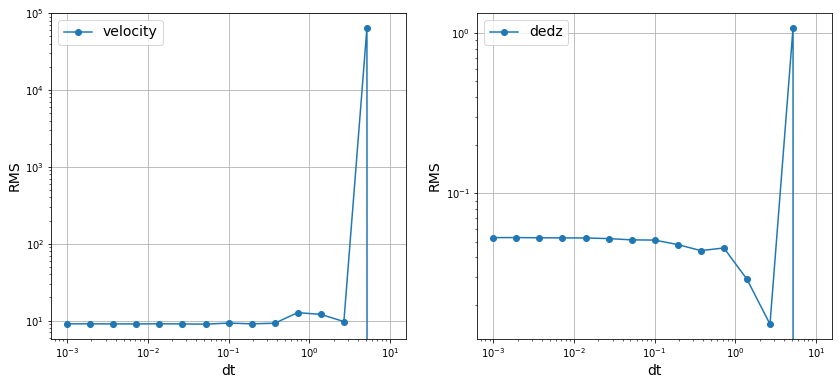

In [10]:
fig = plt.figure(figsize=(14, 6))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

ax1.loglog(dts, RMS[0], label='velocity', marker='o')
ax1.set_xlabel('dt', fontsize='14')
ax1.set_ylabel('RMS', fontsize='14')
ax1.legend(fontsize='14')
ax1.grid()


ax2.loglog(dts, RMS[1], label='dedz', marker='o')
ax2.set_xlabel('dt', fontsize='14')
ax2.set_ylabel('RMS', fontsize='14')
ax2.legend(fontsize='14')
ax2.grid()

## Scipy vs Armageddon
### No assumptions being made this time

In [11]:
earth = armageddon.Planet(atmos_func='exponential')

df, dic = earth.impact(radius=10, velocity=20e3, density=3000, strength=1e5, angle=45,
                   init_altitude=100e3, dt=0.05, radians=False,
                   fragmentation=True, num_scheme='RK', ensemble=False)

schemes_scipy = ['RK45', 'RK23', 'Radau', 'BDF', 'LSODA']

scipy_dfs = []

for i in range(5):
    
    sci_solution = scipy_test.sci_sol(radius=10, velocity=20e3, density=3000, strength=1e5, angle=45, init_altitude=100e3,
                                      dt=0.05, fragmentation=True, num_scheme=schemes_scipy[i])
    print(i)
    scipy_dfs.append(sci_solution)

/Users/Nico/OneDrive - Imperial College London/acse-4-armageddon-mathilde/scipy_test.py:64: RuntimeWarning: overflow encountered in double_scalars
  f[0] = - (C_D * rho_a(y[3]) * y[0]**2 * np.pi * y[5]**2) / (2 * y[1]) + (g * np.sin(y[2]))
/Users/Nico/OneDrive - Imperial College London/acse-4-armageddon-mathilde/scipy_test.py:64: RuntimeWarning: invalid value encountered in double_scalars
  f[0] = - (C_D * rho_a(y[3]) * y[0]**2 * np.pi * y[5]**2) / (2 * y[1]) + (g * np.sin(y[2]))
/Users/Nico/OneDrive - Imperial College London/acse-4-armageddon-mathilde/scipy_test.py:65: RuntimeWarning: overflow encountered in double_scalars
  f[1] = - (C_H * rho_a(y[3]) * np.pi * y[5]**2 * y[0]**3) / (2 * Q)
/Users/Nico/OneDrive - Imperial College London/acse-4-armageddon-mathilde/scipy_test.py:65: RuntimeWarning: invalid value encountered in double_scalars
  f[1] = - (C_H * rho_a(y[3]) * np.pi * y[5]**2 * y[0]**3) / (2 * Q)
/Users/Nico/OneDrive - Imperial College London/acse-4-armageddon-mathilde/scip

0
1
2
3
4


(20000.0, 40000.0)

/Users/Nico/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/Users/Nico/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


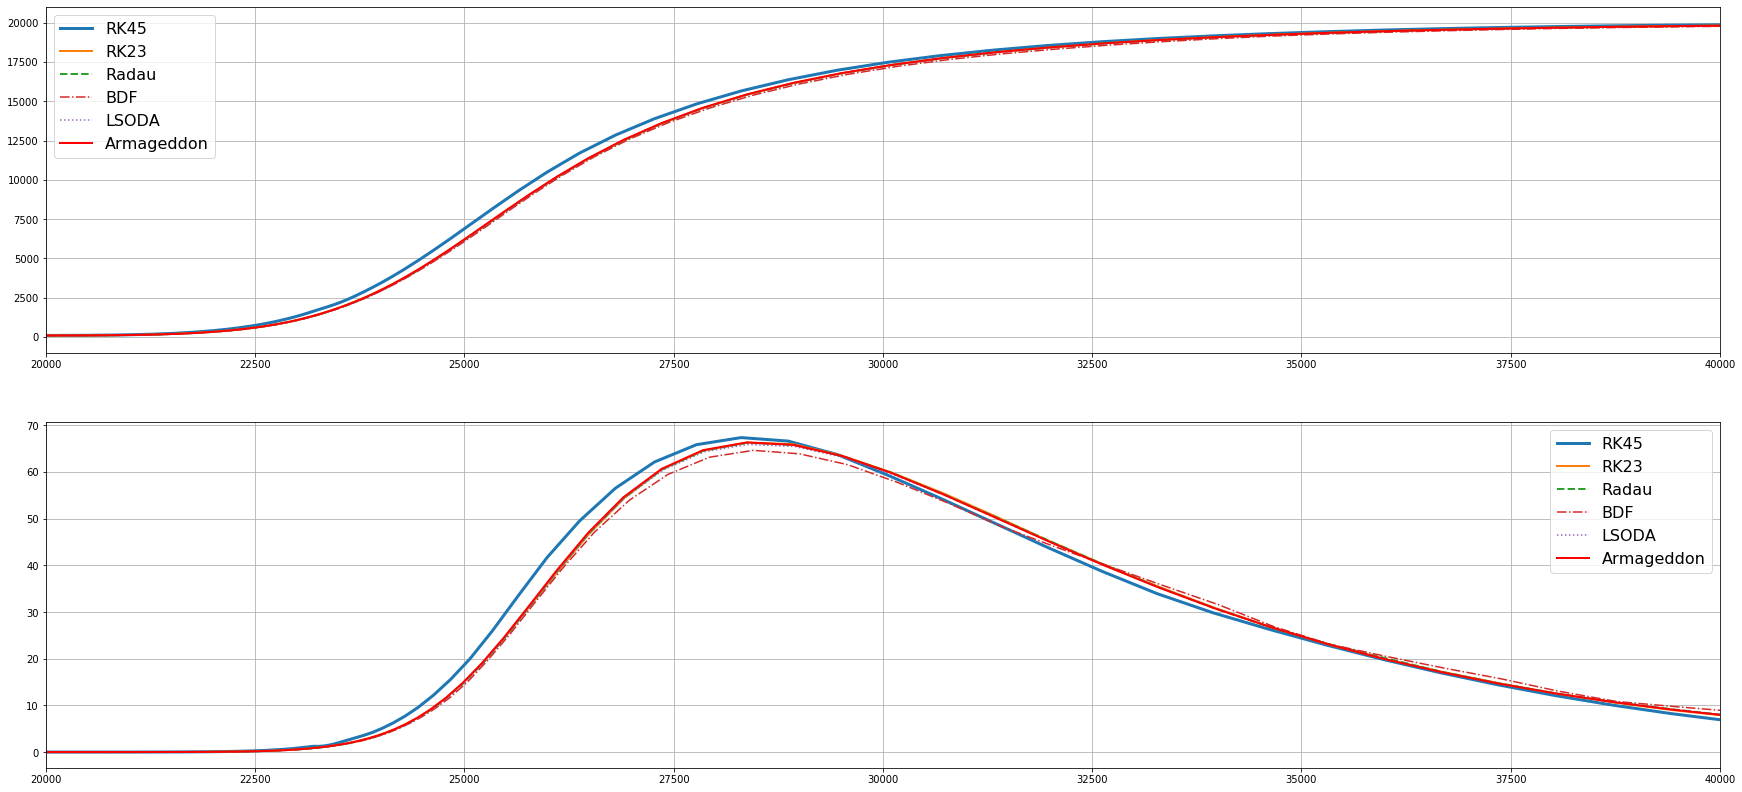

In [12]:
fig = plt.figure(figsize=(30, 14))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)

ax1.plot(scipy_dfs[0].altitude, scipy_dfs[0].velocity, Label='RK45', linewidth='3')
ax1.plot(scipy_dfs[1].altitude, scipy_dfs[1].velocity, Label='RK23', linewidth='2')
ax1.plot(scipy_dfs[2].altitude, scipy_dfs[2].velocity, Label='Radau', linestyle='--', linewidth='2')
ax1.plot(scipy_dfs[3].altitude, scipy_dfs[3].velocity, Label='BDF', linestyle='-.')
ax1.plot(scipy_dfs[4].altitude, scipy_dfs[4].velocity, Label='LSODA', linestyle=':')
ax1.plot(df.altitude, df.velocity, Label='Armageddon', color='r', linewidth='2')
ax1.set_xlim(2e4, 4e4)
ax1.grid()
ax1.legend(fontsize='16')
ax1.set_xlim(0, 1e5)

ax2.plot(scipy_dfs[0].altitude, scipy_dfs[0].dedz, Label='RK45', linewidth='3')
ax2.plot(scipy_dfs[1].altitude, scipy_dfs[1].dedz, Label='RK23', linewidth='2')
ax2.plot(scipy_dfs[2].altitude, scipy_dfs[2].dedz, Label='Radau', linestyle='--', linewidth='2')
ax2.plot(scipy_dfs[3].altitude, scipy_dfs[3].dedz, Label='BDF', linestyle='-.')
ax2.plot(scipy_dfs[4].altitude, scipy_dfs[4].dedz, Label='LSODA', linestyle=':')
ax2.plot(df.altitude, df.dedz, Label='Armageddon', color='r', linewidth='2')
ax2.set_xlim(2e4, 4e4)
ax2.grid()
ax2.legend(fontsize='16')
ax1.set_xlim(2e4, 4e4)

In [13]:
dts = np.logspace(-3, 1, 15)
RMS_velocity = []
RMS_dedz = []
for dt in dts:
    df, dic = earth.impact(radius=10, velocity=20e3, density=3000, strength=1e5, angle=45,
                   init_altitude=100e3, dt=dt, radians=False,
                   fragmentation=True, num_scheme='RK', ensemble=False)
    
    sci_solution = scipy_test.sci_sol(radius=10, velocity=20e3, density=3000, strength=1e5, angle=45, init_altitude=100e3,
                                      dt=dt, fragmentation=True, num_scheme=schemes_scipy[i])

    rms_velocity = np.sqrt(1/len(df) * sum((df.velocity - sci_solution.velocity.loc[:(len(df)-1)])**2))
    rms_dedz = np.sqrt(1/len(df) * sum((df.dedz - sci_solution.dedz.loc[:(len(df)-1)])**2))
    
    RMS_velocity.append(rms_velocity)
    RMS_dedz.append(rms_dedz)

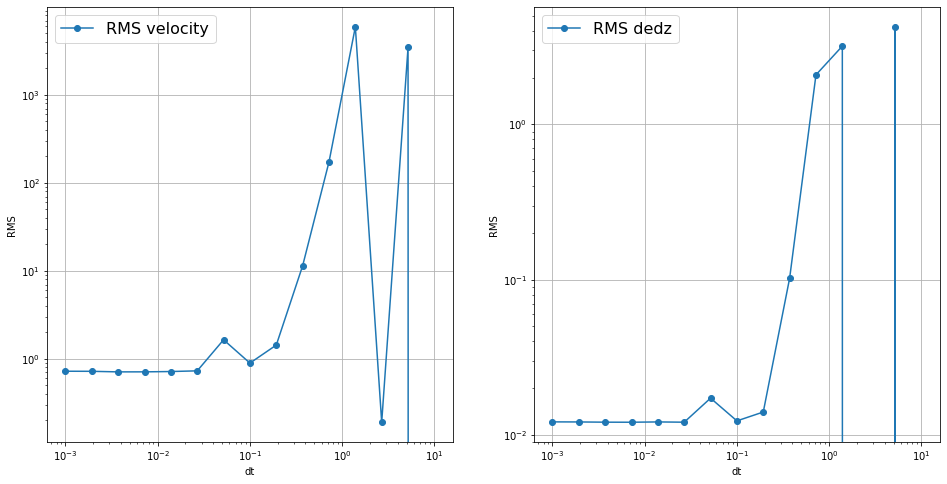

In [14]:
fig = plt.figure(figsize=(16, 8))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

ax1.loglog(dts, RMS_velocity, label='RMS velocity', marker='o')
ax1.set_xlabel('dt')
ax1.set_ylabel('RMS')
ax1.grid()
ax1.legend(fontsize='16')

ax2.loglog(dts, RMS_dedz, label='RMS dedz', marker='o')
ax2.set_xlabel('dt')
ax2.set_ylabel('RMS')
ax2.grid()
ax2.legend(fontsize='16')

## Interpolation of Asteroid Parameters

In [15]:
# Importing our data
want = pd.read_csv('./data/ChelyabinskEnergyAltitude.csv')#, 19200, 3300, None, strength, angle):
want

,Height (km),Energy Per Unit Length (kt Km^-1)
0,42.1922,1.070700
1,39.9311,1.095450
2,39.0415,1.105190
3,38.4485,1.234830
4,38.0784,1.854650
5,37.8198,2.719560
6,37.5237,3.092260
7,37.4129,3.586080
8,37.3025,4.326210
9,37.1547,4.820450


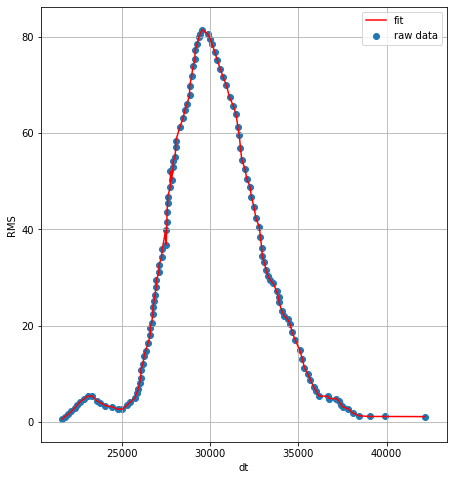

In [16]:
# exctract starting height of data
alt = want.iloc[0,0] * 1e3
x = np.linspace(21000, 42000, 1000) # linspace between max and min height
want = want.sort_values(by='Height (km)', ascending=True) # making sure our x axis ascends
xr = want.iloc[:, 0].values * 1000
yr = want.iloc[:, 1].values

f = si.PchipInterpolator(xr, yr, 10) 

fig = plt.figure(figsize=(16, 8))
ax1 = plt.subplot(121)

ax1.plot(xr, f(xr), 'r', label='fit')
ax1.scatter(xr, want.iloc[:, 1], label='raw data')
ax1.set_xlabel('dt')
ax1.set_ylabel('RMS')
ax1.grid()
ax1.legend()




In [30]:
# prepare input paramters
radii = np.linspace(1, 15, 20)
strengths = np.logspace(4, 7, 20)
input = list(itertools.product(radii, strengths))

# run the solver to get possible solutions
computations = [dask.delayed(earth.solve_atmospheric_entry)
                (par[0], 19200, 3300, par[1], 18.3, init_altitude=42000, num_scheme='EE')
                for par in input]
dedz = [dask.delayed(earth.calculate_energy)(lazy) for lazy in computations]
results = dask.compute(*dedz, scheduler='processes')

# use only the range of our input data
dfs = [r[r.altitude > 25000] for r in results]

rms = [np.sqrt(np.mean(np.power(f(df.altitude) - (df.dedz), 2))) for df in dfs]

index = np.argmin(rms)


fig = plt.figure(figsize=(16, 8))
ax1 = plt.subplot(121)
print(input[index])

ax1.plot(dfs[index].altitude, f(dfs[index].altitude), 'b', label='approximation')
ax1.scatter(dfs[index].altitude, dfs[index].dedz)
ax1.set_xlabel('dt')
ax1.set_ylabel('RMS')
ax1.grid()
ax1.legend()

KeyboardInterrupt: 

In [18]:
# Define fiducial parameters for our ensemble calculation
fiducial_impact = {'radius': 10.0,
                   'angle': 45.0,
                   'strength': 100000.0,
                   'velocity': 21000.0,
                   'density': 3000.0}

# perform the ensemble 
ensemble = armageddon.ensemble.solve_ensemble(earth,
                                              fiducial_impact,
                                              variables=['radius','angle','strength','velocity','density'], radians=False,
                                              rmin=8, rmax=12)

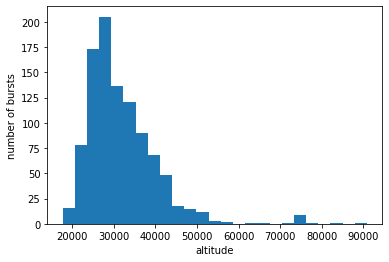

In [19]:
# get the burst altitude
burst_altitude = np.array(ensemble['burst_altitude']).astype('int')
# produce a histogram 
plt.hist(burst_altitude, 25)
plt.xlabel('altitude')
plt.ylabel('number of bursts')
plt.show()

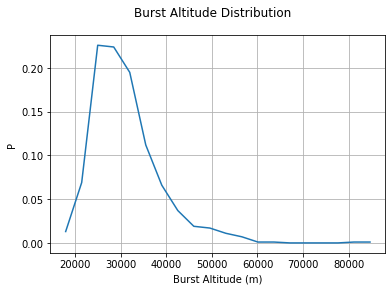

Ensemble simulation performed for 1000 samples.
CPU times: user 4.25 s, sys: 235 ms, total: 4.49 s
Wall time: 23.5 s


In [20]:
%%time 
earth = armageddon.Planet()
fiducial_impact = {'radius': 10.0,
                   'angle': 45.0,
                   'strength': 100000.0,
                   'velocity': 21000.0,
                   'density': 3000.0}
N = int(1000)
ensemble = armageddon.ensemble.solve_ensemble(earth,
                                              fiducial_impact,
                                              variables=['radius','angle', 'strength', 'velocity','density'],
                                              radians=False,
                                              rmin=8, rmax=12, N=N, nval=11)
armageddon.ensemble.plot_burst_altitude(ensemble)
print('Ensemble simulation performed for %d samples.' % N)